# Introduction

Machine learning projects certain fixed steps.
<br>
These are:

- Data preprocessing
- Feature selection/elimination
- Model building, hyperparameter optimization and model evaluation
- Deployment

For instance, in feature engineering, you may need to apply `StandardScaler()` for converting the distribution to a standard normal distribution. Or normalizing the input features using `MinMaxScaler()`. Then maybe you'd need to treat missing values, then you need to convert a column's data type to integer. Then maybe you'd need to select the best features out of the list to build your model on. There are way too many things to mention here that you need to do before you feed a dataset to a model.

**Pipelining** is a method by which each of these processes can be abstracted as a "step". For instance, scaling a column is one(not necessarily, we'd talk more about this later) "step", standard normal scaling is another. We'll see for ourselves using an example with the titanic dataset for demonstration.

In [1]:
import pandas as pd

In [2]:
titanic_train = pd.read_csv('/mnt/e740caee-3850-4dbc-b6c7-e2719c212671/home/arghhjayy/After SSD/Work/16-7-20/titanic_train.csv')

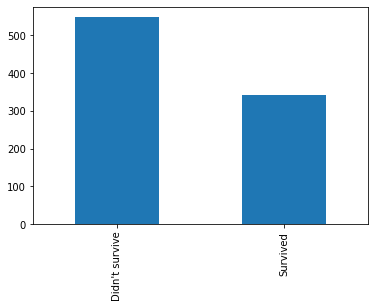

In [3]:
titanic_train['Survived'].value_counts().rename({0: 'Didn\'t survive', 1: 'Survived'}).plot(kind='bar');

ScikitLearn provides the `sklearn.pipeline` module for dealing with pipelines. There are two methods that we're going to use in this notebook:

- `sklearn.pipeline.make_pipeline()`
- `sklearn.pipeline.Pipeline()`

In [4]:
from sklearn.pipeline import make_pipeline, Pipeline

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

The `Pipeline` class constructs a pipeline of the steps mentioned in the list of its constructor. The entries in the list has to be of the folowing form: `(name_in_string, TransformerObject)`. `name_in_string` can be anything, while `TransformerObject` needs to an object of a "Transformer" or an "Estimator".
<br><br>
**Transformer** objects are objects of the class that implements two methods:

1. `fit`
2. `transform`

OR just one method: `fit_transform`

The `fit` method learns the parameters from the dataset. For example, learning mean and standard deviations in case of `StandardScaler`. `transform` actually does the data transformation, i.e. converting input data distribution to standard normal distribution. `fit_transform` does both of these.
<br><br>
**Estimator** objects are objects of the class that implements two methods:

1. `fit`
2. `predict`

OR just one method: `fit_predict`.

`fit` method again learns the parameters for the model and `predict` actually does the predictions.

One implementation detail: the last tuple object in the list passed to `Pipeline` **must be** of the Estimator type.

We're going to apply two operations for the sake of this example to our dataset:

1. Impute the missing values with the mean
2. Conversion to standard normal distribution

By default, these operations will be applied on *all* columns of the dataset. And then finally we're going to feed this data to our model, i.e. a decision tree.

Let's dive in!

In [6]:
pipeline = Pipeline([('mean_imputation', SimpleImputer(strategy='mean')),
                    ('scaler', StandardScaler()),
                    ('model', DecisionTreeClassifier())])

where `SimpleImputer(strategy='mean')` and `StandardScaler()` are objects of Transformer type and `DecisionTreeClassifier()` is an object of Estimator type.

The `pipeline` now acts as an Estimator object, having both `fit` and `predict` methods.

In [7]:
pipeline.fit(titanic_train[['SibSp', 'Age']].values, titanic_train['Survived'].values)

Pipeline(steps=[('mean_imputation', SimpleImputer()),
                ('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier())])

In [8]:
pipeline.predict(titanic_train[['SibSp', 'Age']].values)

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

Now if we want to evaluate our model on the test dataset, we can do that in one line:

In [9]:
titanic_test = pd.read_csv('titanic_test.csv')

In [10]:
pipeline1_result = pipeline.predict(titanic_test[['SibSp', 'Age']].values)

We can do all of this using `make_pipeline` as well:

In [11]:
pipeline2 = make_pipeline(SimpleImputer(strategy='mean'),
               StandardScaler(),
               DecisionTreeClassifier())

In [12]:
pipeline2.fit(titanic_train[['SibSp', 'Age']].values, titanic_train['Survived'])

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [13]:
pipeline2_result = pipeline2.predict(titanic_test[['SibSp', 'Age']])

In [14]:
all(pipeline1_result == pipeline2_result)

False

All the results match!

# References

- Scikit Learn's Pipeline module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline
- https://stackoverflow.com/questions/33091376/python-what-is-exactly-sklearn-pipeline-pipeline
- Titanic dataset: https://www.kaggle.com/c/titanic